In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folderBrains = 'Brains'
fileBrains = 'urls_brains.csv'

folderBreasts = 'Breasts'
fileBreasts = 'urls_breasts.csv'

folderIntestines = 'Intestines'
fileIntestines = 'urls_intestines.csv'

folderLungs = 'Lungs'
fileLungs = 'urls_lungs.csv'

path = Path('drive/My Drive/FastAI_BioInf/CT_Pics')

destBrains = path/folderBrains
destBrains.mkdir(parents=True, exist_ok=True)

destBreasts = path/folderBreasts
destBreasts.mkdir(parents=True, exist_ok=True)

destIntestines = path/folderIntestines
destIntestines.mkdir(parents=True, exist_ok=True)

destLungs = path/folderLungs
destLungs.mkdir(parents=True, exist_ok=True)


In [0]:
classes = ['Brains','Breasts','Intestines','Lungs']

In [8]:
download_images(path/fileBrains, destBrains, max_pics=200)
download_images(path/fileBreasts, destBreasts, max_pics=200)
download_images(path/fileIntestines, destIntestines, max_pics=200)
download_images(path/fileLungs, destLungs, max_pics=200)

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Brains


Breasts


Intestines


Lungs


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['Brains', 'Breasts', 'Intestines', 'Lungs']

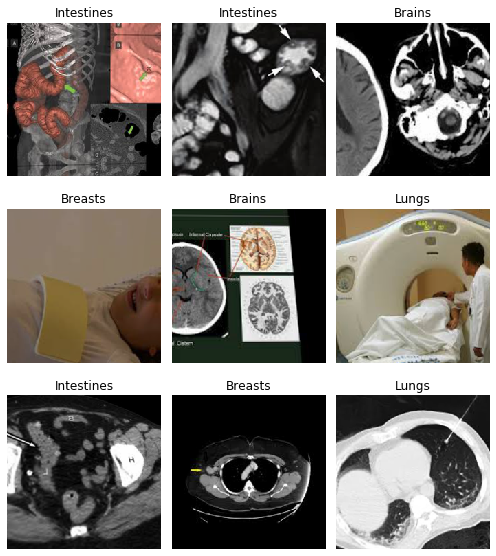

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Brains', 'Breasts', 'Intestines', 'Lungs'], 4, 544, 136)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.858753,1.105965,0.404412,00:07
1,1.421463,0.997360,0.294118,00:07
2,1.135860,1.055161,0.279412,00:07
3,0.937837,1.053223,0.257353,00:07


In [0]:
learn.save('stage-1')